# 1. Giới thiệu

Bài này chúng ta sẽ làm quen với một trong những thuật toán cơ bản nahtas trong Unsupervised learning - thuật toán K-means clustering (phân cụm K-means)

Trong thuật toán K-means clustering, chúng ta không biết nhãn (label) của từng điểm dữ liệu. Mục đích là làm thể nào để phân dữ liệu thành các cụm (cluster) khác nhau sao cho dữ liệu trong cùng một cụm có tính chất giống nhau.

# 2. Phân tích toán học

 Ví dụ: nếu một điểm dữ liệu có label vector là [1,0,0,…,0] thì nó thuộc vào cluster 1, là [0,1,0,…,0] thì nó thuộc vào cluster 2, …. Cách mã hóa label của dữ liệu như thế này được goi là biểu diễn one-hot.

## Tóm tắt thuật toán
Đầu vào: Dữ liệu X và số lượng cluster cần tìm K.

Đầu ra: Các center M và label vector cho từng điểm dữ liệu Y.

1. Chọn K điểm bất kỳ làm các center ban đầu.
2. Phân mỗi điểm dữ liệu vào cluster có center gần nó nhất.
3. Nếu việc gán dữ liệu vào từng cluster ở bước 2 không thay đổi so với vòng lặp trước nó thì ta dừng thuật toán.
4. Cập nhật center cho từng cluster bằng cách lấy trung bình cộng của tất các các điểm dữ liệu đã được gán vào cluster đó sau bước 2.
5. Quay lại bước 2.

# 3. Ví dụ trên python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [3]:
means = [[2,2], [8,3],[3,6]]
cov = [[1,0], [0,1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis=0)
K=3   # number of clusters

original_label = np.asarray([0]*N+[1]*N+[2]*N)

### Hiển thị dữ liệu trên đồ thị

Chúng ta cần một hàm kmeans_display để hiển thị dữ liệu. Sau đó hiển thị dữ liệu theo nhãn ban đầu.

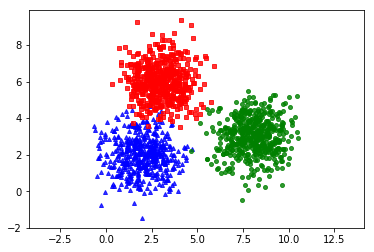

In [6]:
def kmeans_display(X, label):
    K = np.amax(label)+1
    X0 = X[label==0,:]
    X1 = X[label==1,:]
    X2 = X[label==2,:]
    
    plt.plot(X0[:,0], X0[:,1], 'b^', markersize=4, alpha=.8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    
    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(X, original_label)

## Các hàm số cần thiết cho K-means clustering

Viết các hàm
1. *kmeans_init_centers* để khởi tạo các centers ban đầu
2. *kmeans_assign_labels* để gán nhãn mới cho các điểm khi biết các centers.
3. *kmeans_update_center* để cập nhật các centers mới dựa trên dữ liệu vừa được gán nhãn.
4. *has_converged* để kiểm tra điều kiện dừng của thuật toán

In [7]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]


def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis=1)

def kmeans_upadte_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels==k,:]
        # take average
        centers[k,:] = np.mean(Xk, axis=0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

### Phần chính của K-means clustering

In [8]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_upadte_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it+=1
    return (centers, labels, it)

### Áp dụng thuật toán vừa viết vào dữ liệu ban đầu, hiển thị kết quả cuối cùng

Centers found by our algorithm: 
[[ 2.99084705  6.04196062]
 [ 1.97563391  2.01568065]
 [ 8.03643517  3.02468432]]


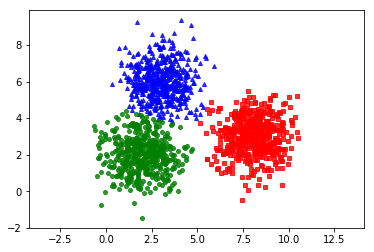

In [9]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm: ')
print(centers[-1])

kmeans_display(X, labels[-1])